In [216]:
%pip install -U seaborn


[notice] A new release of pip is available: 24.0 -> 25.0.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [217]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import warnings
from IPython.display import Image

warnings.filterwarnings('ignore')

# Unicode warning 제거 (폰트 관련 경고메시지)
plt.rcParams['axes.unicode_minus']=False

# 그래프 출력 사이즈 설정
plt.rcParams["figure.figsize"] = (12, 3)

## 기본 그래프
1) Scatter plot

2) Barplot, Barhplot

3) Box Plot

4) Histogram

5) Line Plot

### 1. Scatter Plot

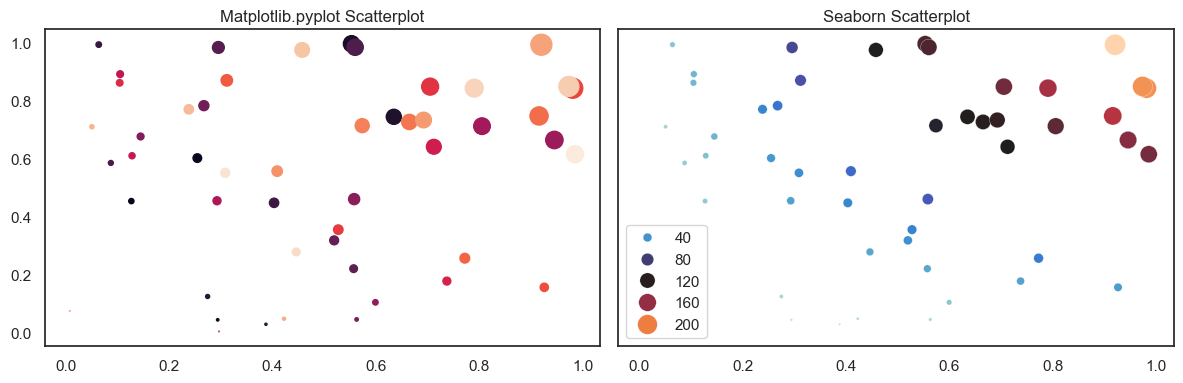

In [218]:
# Scatterplot

## Data
x = np.random.rand(50)
y = np.random.rand(50)
## styling
colors = np.arange(50)
area = x * y * 250 

## Create subplots
fig, axs = plt.subplots(1,2,tight_layout = True, sharey = True) 
fig.set_size_inches(12, 4)

## Matplotlib scatterplot
axs[0].scatter(x,y, s = area, c = colors)
axs[0].set_title('Matplotlib.pyplot Scatterplot')

## Seaborn scatterplot
sns.scatterplot(ax=axs[1],x=x, y=y, size = area, sizes = (area.min(), area.max()), hue = area, palette = 'icefire')
# Add title to the Seaborn plot using set()
axs[1].set(title='Seaborn Scatterplot')


plt.show()

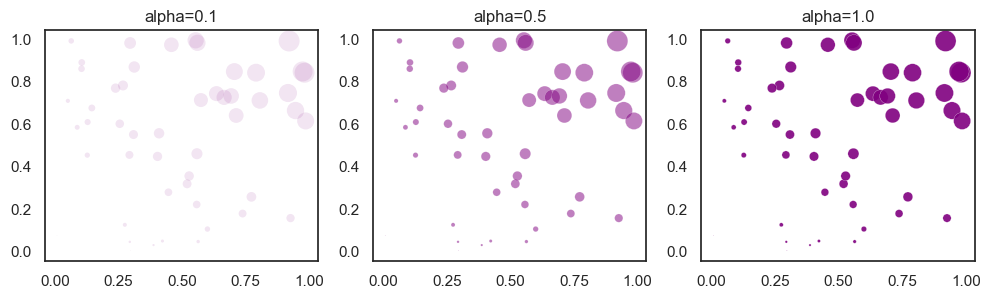

In [219]:
plt.figure(figsize=(12, 3))

plt.subplot(131)
plt.title('alpha=0.1')
g = sns.scatterplot(x=x, y=y, size=area, sizes=(area.min(), area.max()), color='purple', alpha=0.1)
g.get_legend().remove()

plt.subplot(132)
plt.title('alpha=0.5')
g = sns.scatterplot(x=x, y=y, size=area, sizes=(area.min(), area.max()), color='purple', alpha=0.5)
g.get_legend().remove()

plt.subplot(133)
plt.title('alpha=1.0')
g = sns.scatterplot(x=x, y=y, size=area, sizes=(area.min(), area.max()), color='purple', alpha=0.9)
g.get_legend().remove()

plt.show()


Text(0.5, 1.0, 'alpha = 1')

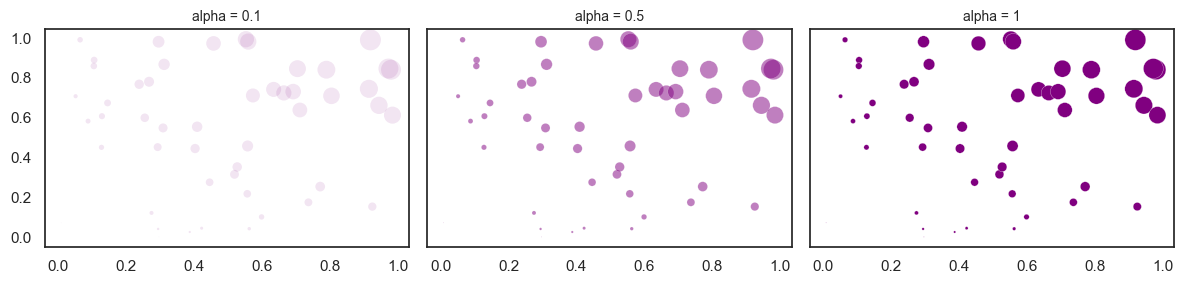

In [220]:
fig, axs = plt.subplots(1,3,sharey= True, tight_layout= True)
fig.set_size_inches(12,3)

sns.scatterplot(ax=axs[0], x=x, y=y, size=area, sizes=(area.min(), area.max()), color='purple', alpha=0.1)
axs[0].get_legend().remove()
axs[0].set_title('alpha = 0.1', fontsize = 10)

sns.scatterplot(ax=axs[1], x=x, y=y, size=area, sizes=(area.min(), area.max()), color='purple', alpha=0.5)
axs[1].get_legend().remove()
axs[1].set_title('alpha = 0.5', fontsize = 10)

sns.scatterplot(ax=axs[2], x=x, y=y, size=area, sizes=(area.min(), area.max()), color='purple', alpha=1)
axs[2].get_legend().remove()
axs[2].set_title('alpha = 1', fontsize = 10)

### 2. Bar/Barh plot 
- 임의의 데이터로 그리는 경우 Matplotlib.pyplot
- 데이터 프레임을 가지고 그리는 경우 Seaborn

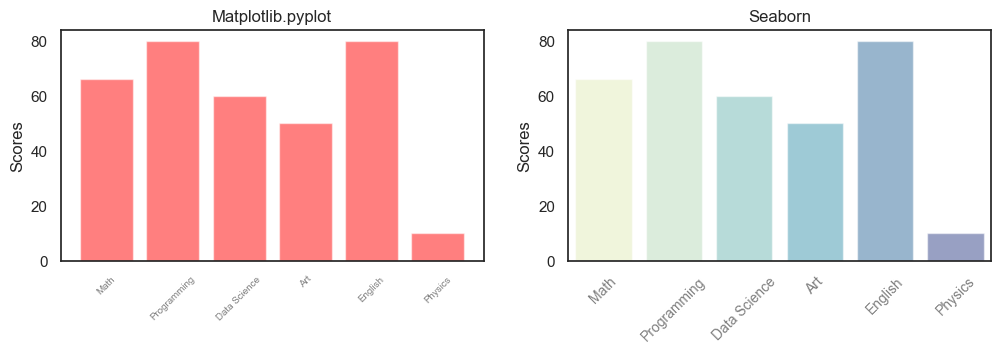

In [221]:
plt.figure(figsize=(12,3))

x = ['Math', 'Programming', 'Data Science', 'Art', 'English', 'Physics']
y = [66, 80, 60, 50, 80, 10]

plt.subplot(1,2,1)
plt.bar(x, y, alpha=0.5, color = 'red')
plt.xticks(rotation = 45, fontsize = 7, color = 'grey')
plt.ylabel('Scores')
plt.title('Matplotlib.pyplot')

plt.subplot(1,2,2)
sns.barplot(x=x, y=y, alpha= 0.5, palette='YlGnBu', hue = x, legend= False) # hue = 그룹화 변수
plt.xticks(rotation = 45, fontsize = 10, color = 'grey')
plt.ylabel('Scores')
plt.title('Seaborn')

plt.show()


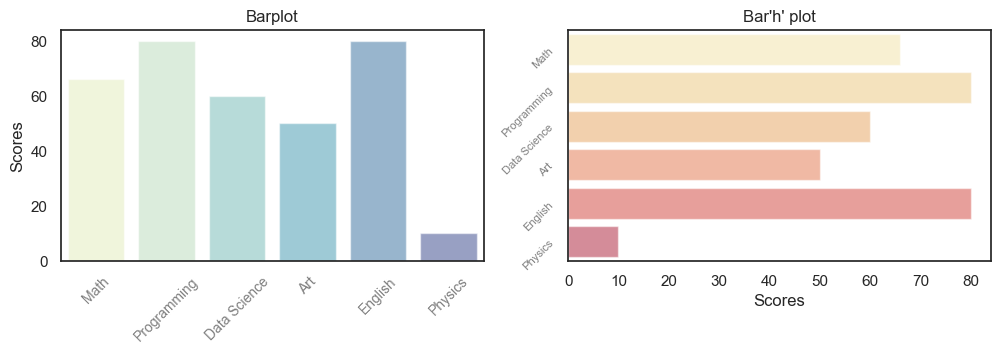

In [222]:
plt.figure(figsize=(12,3))

x = ['Math', 'Programming', 'Data Science', 'Art', 'English', 'Physics']
y = [66, 80, 60, 50, 80, 10]

plt.subplot(1,2,1)
sns.barplot(x=x, y=y, alpha= 0.5, palette='YlGnBu', hue = x, legend= False) # hue = 그룹화 변수
plt.xticks(rotation = 45, fontsize = 10, color = 'grey')
plt.ylabel('Scores')
plt.title('Barplot')

plt.subplot(1,2,2)
sns.barplot(x=y, y=x, alpha= 0.5, palette='YlOrRd', hue = x, legend= False) # hue = 그룹화 변수
plt.yticks(rotation = 45, fontsize = 8, color = 'grey')
plt.xlabel('Scores')
plt.title("Bar'h' plot")

plt.show()


In [223]:
titanic = sns.load_dataset('titanic')

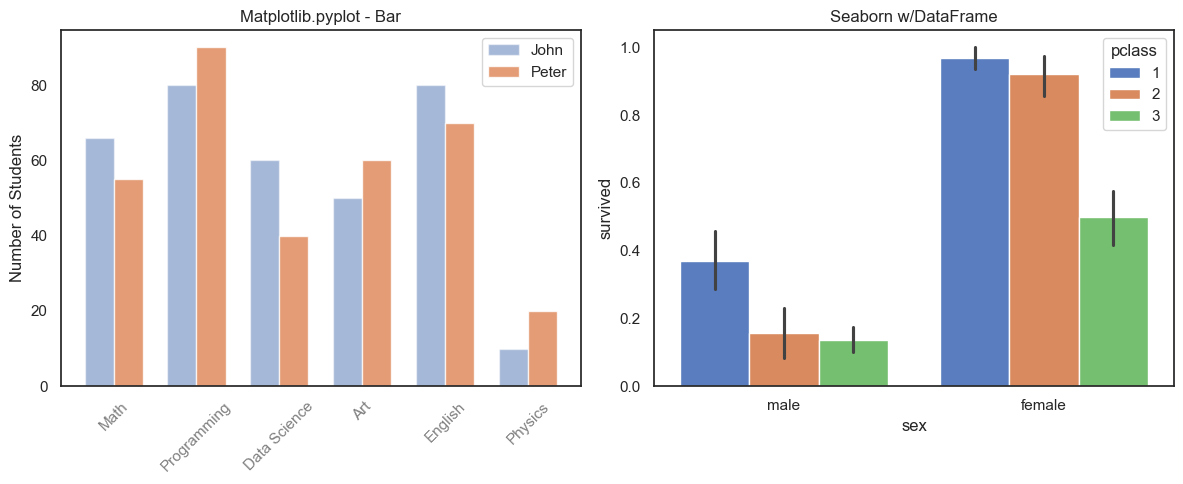

In [224]:
# Bar plot에서 비교 그래프 그리기

x_label = ['Math', 'Programming', 'Data Science', 'Art', 'English', 'Physics']
y_1 = [66, 80, 60, 50, 80, 10]
y_2 = [55, 90, 40, 60, 70, 20]
width = 0.35 ; x = np.arange(len(x_label)) # 넓이 지정


# subplots 생성
fig, axes = plt.subplots(1,2,tight_layout = True)
fig.set_size_inches(12,5)

# using Matplotlib
## 넓이 설정
axes[0].bar(x - width/2, y_1, width, align='center', alpha=0.5)
axes[0].bar(x + width/2, y_2, width, align='center', alpha=0.8)
## xtick 설정
axes[0].set_xticks(np.arange(len(x_label)))  # Set the tick locations
axes[0].set_xticklabels(x_label, rotation=45, color='grey') # Set the tick labels

axes[0].set_ylabel('Number of Students')
axes[0].set_title('Matplotlib.pyplot - Bar')
axes[0].legend(['John', 'Peter'])

# using Seaborn
sns.barplot(ax=axes[1],x='sex', y='survived', hue= 'pclass', data=titanic, palette='muted')
axes[1].set_title('Seaborn w/DataFrame')

plt.tight_layout()  # Adjust layout to prevent labels from overlapping
plt.show()


### 3.Box Plot

In [225]:
# 샘플 데이터 생성
spread = np.random.rand(50) * 100
center = np.ones(25) * 50
flier_high = np.random.rand(10) * 100 + 100
flier_low = np.random.rand(10) * -100
data = np.concatenate((spread, center, flier_high, flier_low))

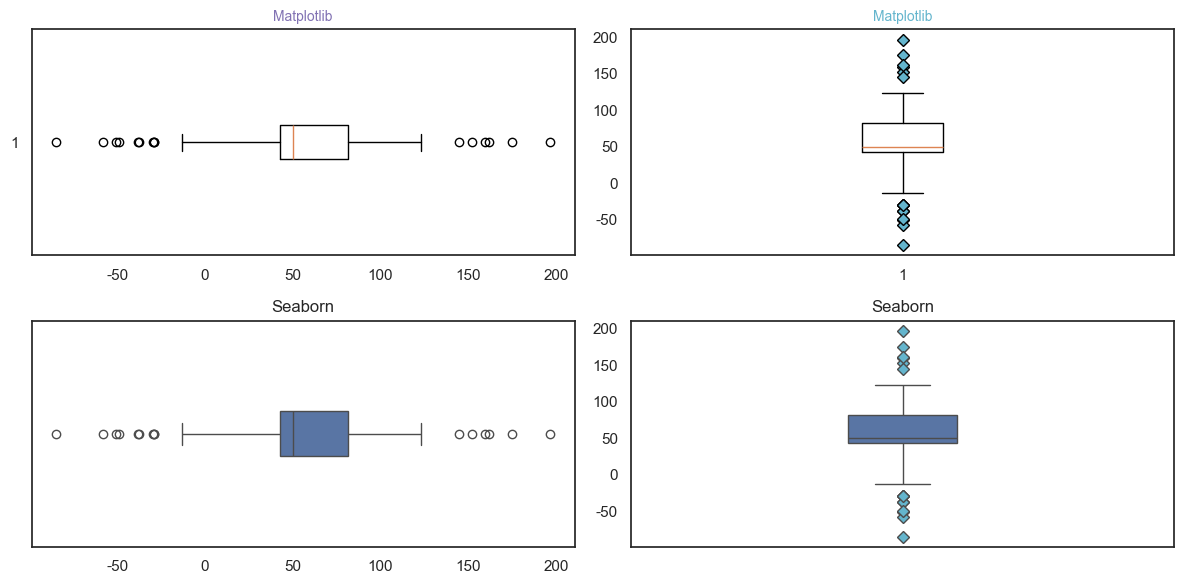

In [226]:
fig, axs = plt.subplots(2,2,
                        tight_layout = True
                        )

fig.set_size_inches(12, 6)


# Matplotlib
axs[0,0].boxplot(data, vert = False)
axs[0,0].set_title('Matplotlib', fontsize = 10, color = 'm')
axs[0,1].boxplot(data, flierprops = dict(markerfacecolor='c', marker='D'))
axs[0,1].set_title('Matplotlib', fontsize = 10, color = 'c')

# Seaborn
sns.boxplot(ax=axs[1,0],data=data, orient='h', width=0.2)
axs[1,0].set(title='Seaborn')
sns.boxplot(ax= axs[1,1],data=data, orient='v', width=0.2, flierprops = dict(markerfacecolor='c', marker='D'))
axs[1,1].set(title='Seaborn')

plt.show()


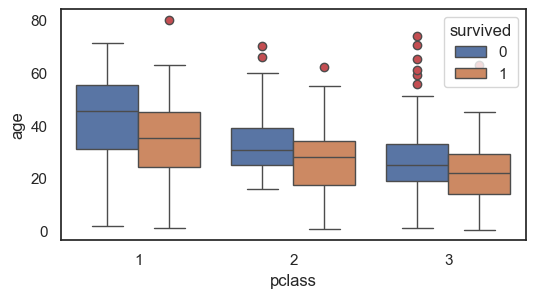

In [227]:
plt.figure(figsize=(6,3))

outlier_marker = dict(markerfacecolor='r', marker='o')
sns.boxplot(x='pclass', y='age', hue='survived', data=titanic, flierprops=outlier_marker)
plt.show()

### 4. Histogram

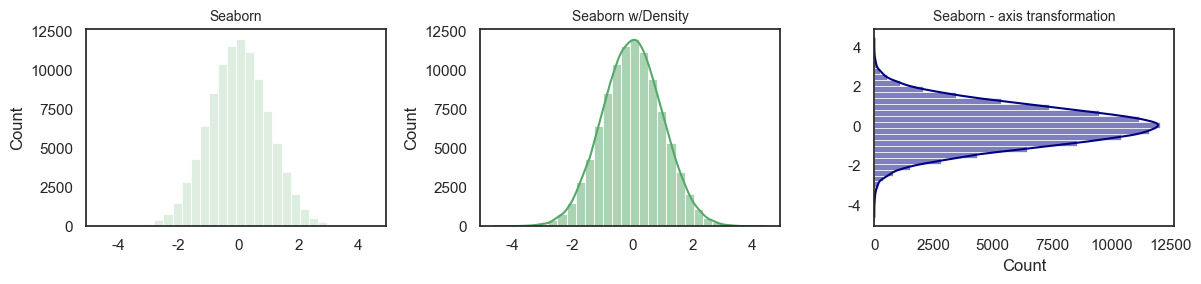

In [228]:
N = 100000
bins = 30
x = np.random.randn(N)

plt.figure(figsize = (12,3))

plt.subplot(1,3,1)
sns.histplot(x, bins=bins, kde=False, color='g', alpha = .2)
plt.title('Seaborn', fontsize = 10)

plt.subplot(1,3,2)
sns.histplot(x, bins=bins, kde=True, color='g') #kde = True ; Density가 표기됨
plt.title('Seaborn w/Density', fontsize = 10)

plt.subplot(1,3,3)
sns.histplot(y=x, bins=bins, kde=True, color='navy')
plt.title('Seaborn - axis transformation', fontsize = 10)

plt.tight_layout()
plt.show()


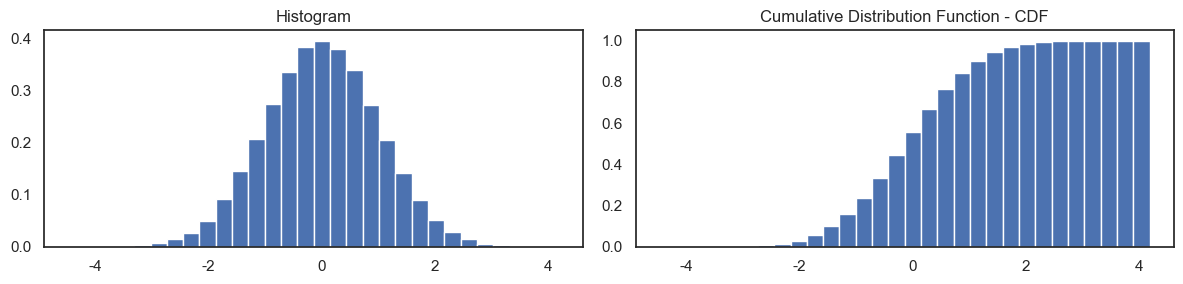

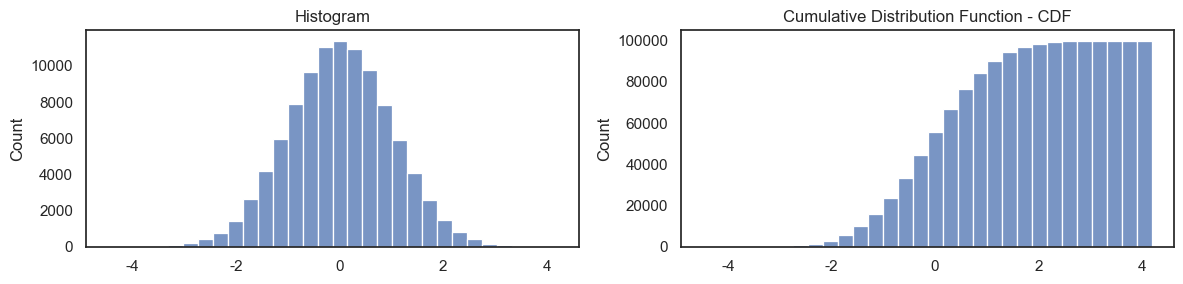

In [229]:
N = 100000
bins = 30
x = np.random.randn(N)


# Using Matplotlib
fig, axs = plt.subplots(1,2,tight_layout = True)
fig.set_size_inches(12, 3)

axs[0].hist(x, bins = bins, density = True)
axs[1].hist(x, bins = bins, density = True, cumulative = True)
axs[0].set_title('Histogram')
axs[1].set_title('Cumulative Distribution Function - CDF')
plt.show()


# Using Seaborn
fig, axes = plt.subplots(1, 2, tight_layout=True)
fig.set_size_inches(12, 3)

sns.histplot(x=x, bins=bins, ax=axes[0])
sns.histplot(x=x, bins=bins, cumulative=True, ax=axes[1])
axes[0].set_title('Histogram')
axes[1].set_title('Cumulative Distribution Function - CDF')

plt.show()


### 5. Line Plot

In [230]:
# 샘플 데이터 생성
x = np.arange(0, 10, 0.1)
y_1 = np.sin(x)
y_2 = np.cos(x)

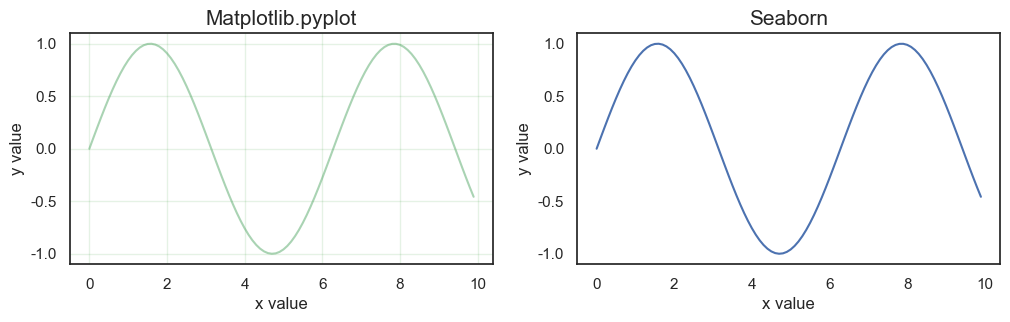

In [231]:
plt.figure(figsize=(12,3))

plt.subplot(121)
plt.plot(x,y_1, c = 'g', alpha = .5)
plt.grid(alpha = 0.1, color = 'green')
plt.xlabel('x value', fontsize=12)
plt.ylabel('y value', fontsize=12)
plt.title('Matplotlib.pyplot', fontsize=15)


plt.subplot(122)
sns.set_style("darkgrid") # Grid style
sns.lineplot(x=x, y=y_1)

plt.xlabel('x value', fontsize=12)
plt.ylabel('y value', fontsize=12)
plt.title('Seaborn', fontsize=15)

plt.show()

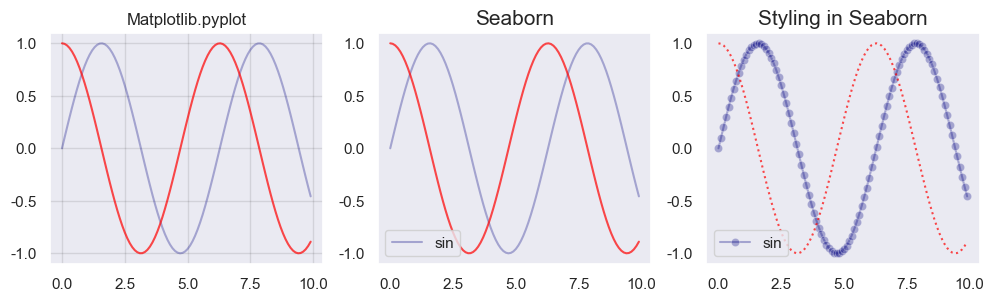

In [232]:
plt.figure(figsize=(12,3))

plt.subplot(131)
plt.plot(x,y_1, label = 'sin', color = 'navy', alpha = .3)
plt.plot(x,y_2, label = 'cos', color = 'red', alpha = .7)
plt.grid(alpha = 0.1, color = 'black')
plt.title('Matplotlib.pyplot')


plt.subplot(132)
sns.lineplot(x=x, y=y_1, label='sin', color='navy', alpha=0.3)
sns.lineplot(x=x, y=y_2, label='cos', color='red', alpha=0.7, legend=False)
# plt.xlabel('x value', fontsize=12)
# plt.ylabel('y value', fontsize=12)
plt.title('Seaborn', fontsize=15)
plt.grid()

# Styling in seaborn
plt.subplot(133)
sns.lineplot(x=x, y=y_1, label='sin', color='navy', alpha=0.3, marker = 'o')
sns.lineplot(x=x, y=y_2, label='cos', color='red', alpha=0.7, linestyle = ':', legend=False)
# plt.xlabel('x value', fontsize=12)
# plt.ylabel('y value', fontsize=12)
plt.title('Styling in Seaborn', fontsize=15)
plt.grid()


plt.show()


## 통계 기반 그래프 - 통계 차트

1) Cat plot

2) Count Plot

3) Heat map

4) Histogram 

5) Joint plot

6) Kde plot

7) Pair Plot

8) Rel Plot

9) Violin Plot 

10) Im Plot

11) Others - RugPlot, Swam Plot

#### Sample Data load

In [233]:
# Sample Data load
titanic = sns.load_dataset('titanic')
tips = sns.load_dataset('tips')
iris = sns.load_dataset('iris')

print(titanic.head()); print(tips.columns)
titanic.columns



   survived  pclass     sex   age  sibsp  parch     fare embarked  class  \
0         0       3    male  22.0      1      0   7.2500        S  Third   
1         1       1  female  38.0      1      0  71.2833        C  First   
2         1       3  female  26.0      0      0   7.9250        S  Third   
3         1       1  female  35.0      1      0  53.1000        S  First   
4         0       3    male  35.0      0      0   8.0500        S  Third   

     who  adult_male deck  embark_town alive  alone  
0    man        True  NaN  Southampton    no  False  
1  woman       False    C    Cherbourg   yes  False  
2  woman       False  NaN  Southampton   yes   True  
3  woman       False    C  Southampton   yes  False  
4    man        True  NaN  Southampton    no   True  
Index(['total_bill', 'tip', 'sex', 'smoker', 'day', 'time', 'size'], dtype='object')


Index(['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare',
       'embarked', 'class', 'who', 'adult_male', 'deck', 'embark_town',
       'alive', 'alone'],
      dtype='object')

### 1. Catplot

"figure-level function in Seaborn used __to draw categorical plots onto a FacetGrid.__ 
It provides a high-level interface for creating various types of plots that <u>visualize the relationship between one or more categorical variables</u> and <u>one or more numerical variables</u>. It's called "figure-level" because it creates and manages the entire figure, including subplots, automatically."

https://seaborn.pydata.org/generated/seaborn.catplot.html

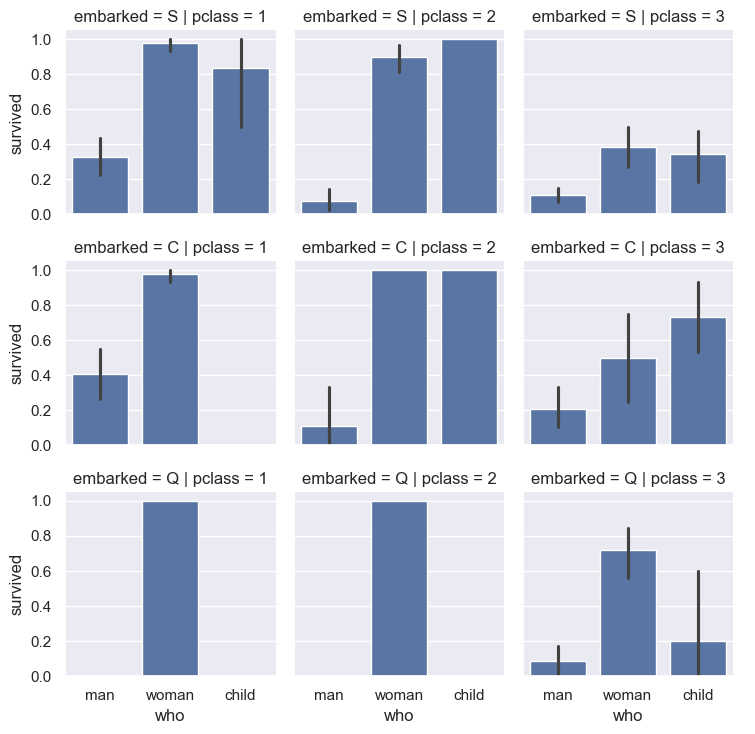

In [234]:
# 검은색 bar는 오차막대(error bar) 이며 신뢰구간(confidence interval) 95%

sns.catplot(x='who', y='survived', 
            col='pclass', 
            row='embarked',
            kind='bar',   
            height=2.5, 
            data=titanic)


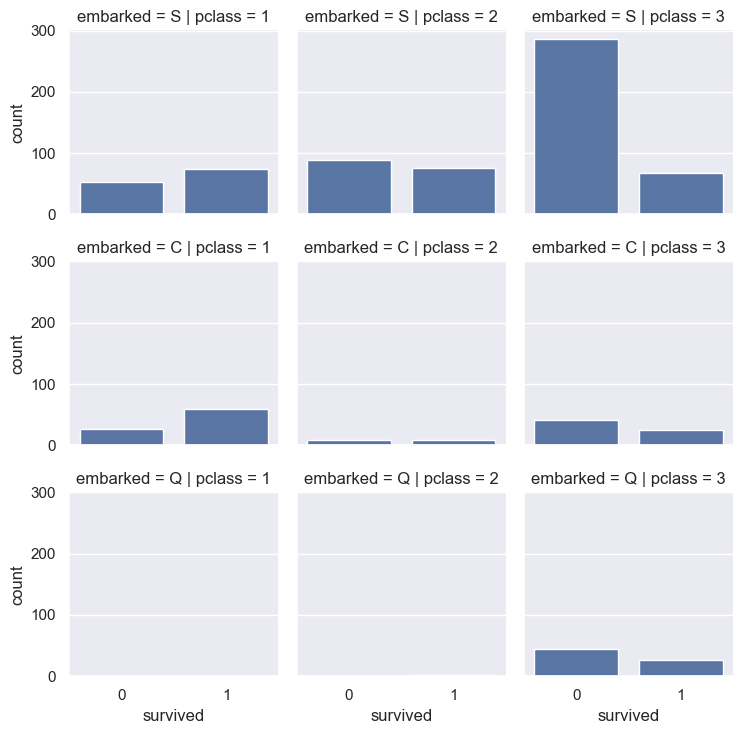

In [235]:
sns.catplot(x='survived', 
            col='pclass', 
            row='embarked',
            kind='count',
            height=2.5, 
            data=titanic)

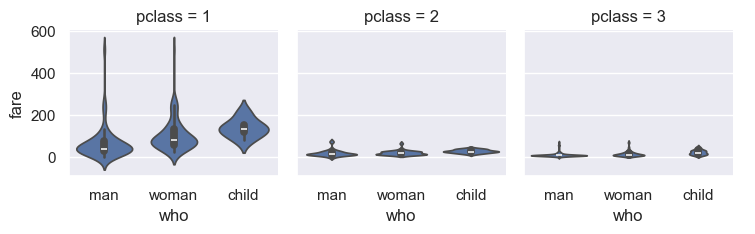

In [236]:
sns.catplot(x='who',
            y='fare', 
            col='pclass', 
            kind='violin',   
            height=2.5, 
            data=titanic)


### 2. Count Plot

A count plot can be thought of **<u>as a histogram across a categorical</u>**, instead of quantitative, variable. The basic API and options are identical to those for barplot(), so you can <u>compare counts across nested variables</u>.

[공식문서](https://seaborn.pydata.org/generated/seaborn.countplot.html)

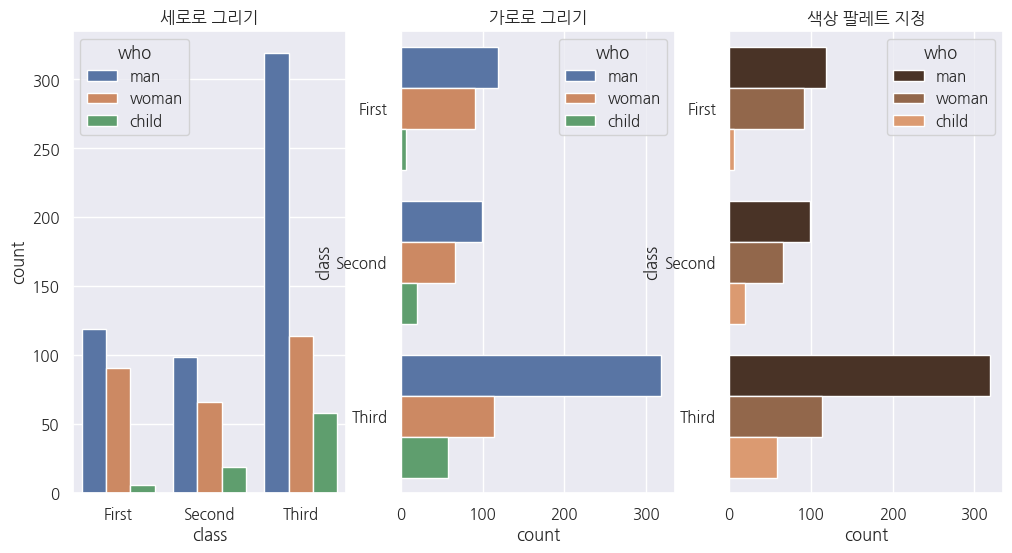

In [237]:
plt.rcParams['font.family'] = 'NanumGothic' # 한글 입력 위한 셋팅

plt.figure(figsize = (12,6))

# sns.set(style='darkgrid') # 배경을 darkgrid 로 설정

plt.subplot(131)
sns.countplot(x="class", hue="who", data=titanic)
plt.title('세로로 그리기')

plt.subplot(132)
sns.countplot(y="class", hue="who", data=titanic)
plt.title("가로로 그리기")

plt.subplot(133)
sns.countplot(y="class", hue="who", palette='copper',data=titanic)
plt.title("색상 팔레트 지정")

plt.show()


### 3. Heatmap

히트 맵(heat map)은 열을 뜻하는 히트(heat)와 지도를 뜻하는 맵(map)을 결합시킨 단어로, 
색상으로 표현할 수 있는 다양한 정보를 일정한 이미지 위에 열분포 형태의 비주얼한 그래픽으로 출력하는 것이 특징

[공식문서](https://seaborn.pydata.org/generated/seaborn.heatmap.html#seaborn.heatmap)

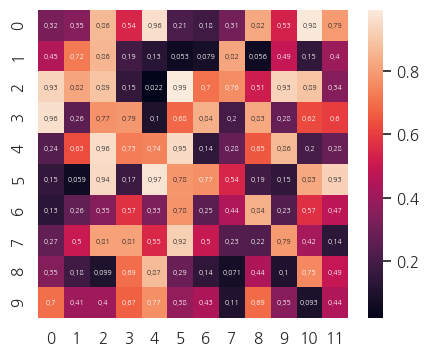

In [238]:
uniform_data = np.random.rand(10, 12)

plt.figure(figsize=(5, 4))

sns.heatmap(uniform_data, annot=True, annot_kws={"fontsize":5})
plt.show()


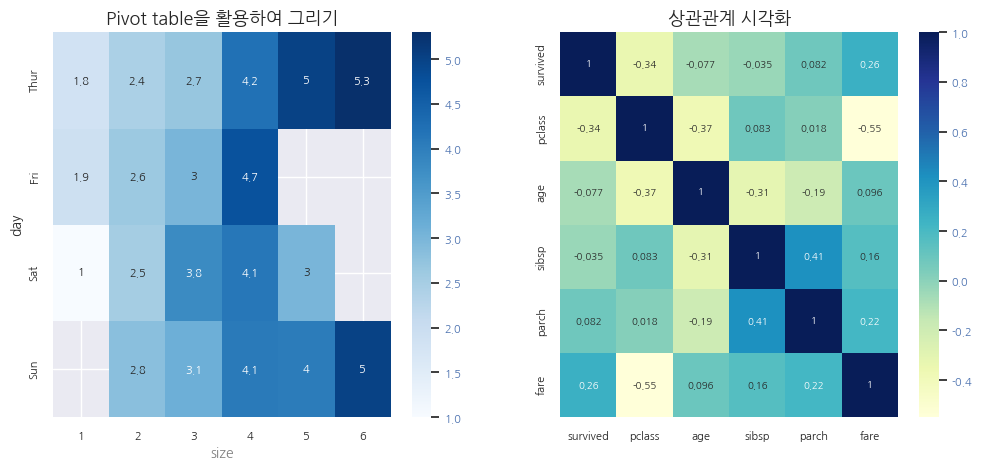

In [239]:
plt.rcParams['font.family'] = 'NanumGothic' # 한글 입력 위한 셋팅

'''데이터 확인'''
tips.columns

pivot = tips.pivot_table(index='day', columns='size', values='tip').sort_index(ascending=True)
# pivot = pivot.sort_index(ascending=False)
pivot
''''''

plt.figure(figsize=(12, 5))

# Pivot Table 활용하여 그리기
plt.subplot(121)

pivot = tips.pivot_table(index='day', columns='size', values='tip').sort_index(ascending=True)
ax = sns.heatmap(pivot, cmap='Blues', annot=True, annot_kws={"fontsize":8})

ax.tick_params(labelsize = 8)
ax.set_xlabel(ax.get_xlabel(), fontsize=10, color = 'grey') 
ax.set_ylabel(ax.get_ylabel(), fontsize=10)  
ax.collections[0].colorbar.ax.tick_params(labelsize=8, labelcolor = 'b') # 컬러바
plt.title('Pivot table을 활용하여 그리기', fontsize = 13)

# Correlatio(상관관계)시각화
plt.subplot(122)
numerical_titanic = titanic.select_dtypes(include=np.number) # Select only numerical columns for correlation calculation

ax = sns.heatmap(numerical_titanic.corr(), annot=True, cmap="YlGnBu", annot_kws={"fontsize":7})
ax.tick_params(labelsize = 8)
ax.set_xlabel(ax.get_xlabel(), fontsize=10, color = 'grey') 
ax.set_ylabel(ax.get_ylabel(), fontsize=10)  
ax.collections[0].colorbar.ax.tick_params(labelsize=8, labelcolor = 'b') # 컬러바
plt.title('상관관계 시각화', fontsize = 13)

plt.show()


### 4. Histplot
Matplotlib의 `hist` 그래프와 `kdeplot`을 통합한 그래프 ; 분포와 밀도 확인

[공식문서](https://seaborn.pydata.org/generated/seaborn.distplot.html#seaborn.distplot)

In [240]:
# 샘플데이터 생성
x = np.random.randn(100)


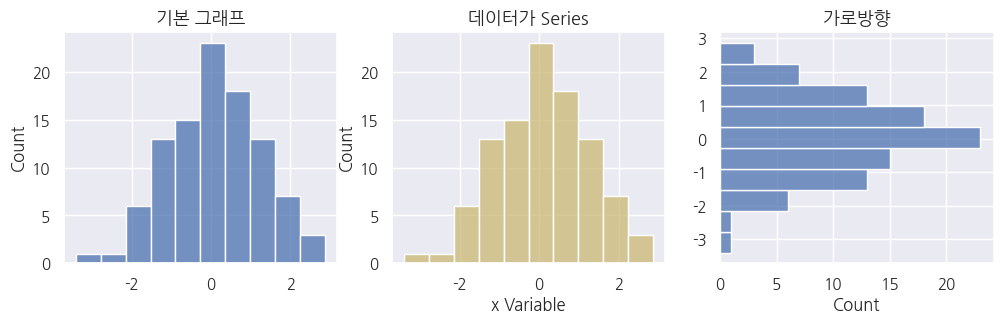

In [241]:

plt.figure(figsize= (12,3))

plt.subplot(131)
sns.histplot(x=x)
plt.title('기본 그래프', fontsize = 13)

plt.subplot(132)
sns.histplot(x=pd.Series(x, name= 'x Variable'),color='y')
plt.title('데이터가 Series', fontsize = 13)

plt.subplot(133)
sns.histplot(y=x)
plt.title('가로방향', fontsize = 13)

plt.show()

### 5. Joint plot
Scatter와 Histogram 동시에 그려줌

**`"주의"`** 오직 <u>숫자형 데이터</u>만 표현 가능 함

[공식문서](https://seaborn.pydata.org/generated/seaborn.jointplot.html#seaborn.jointplot)

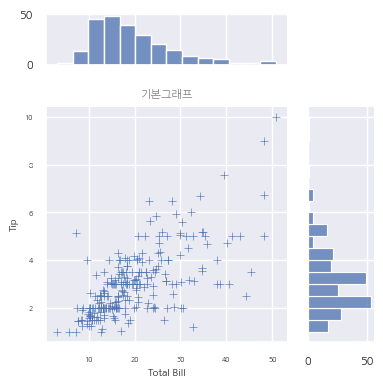

In [242]:
g = sns.jointplot(data=tips, x="total_bill", y="tip", height=4, s = 30, marker='+', 
                    ratio = 3, marginal_ticks = True)

# Customize the ticks
g.ax_joint.tick_params(axis='x', labelsize=5)
g.ax_joint.tick_params(axis='y', labelsize=5)

# Adjust the tick label size on the marginal histograms
g.ax_marg_x.tick_params(labelsize=8)  # Adjust x-axis tick labels
g.ax_marg_y.tick_params(labelsize=8)  # Adjust y-axis tick labels

# Adjust the axis labels
g.ax_joint.set_xlabel('Total Bill', fontsize=7)
g.ax_joint.set_ylabel('Tip', fontsize=7)

plt.title("기본그래프", fontsize = 8, color = 'grey')

plt.tight_layout()
plt.show()


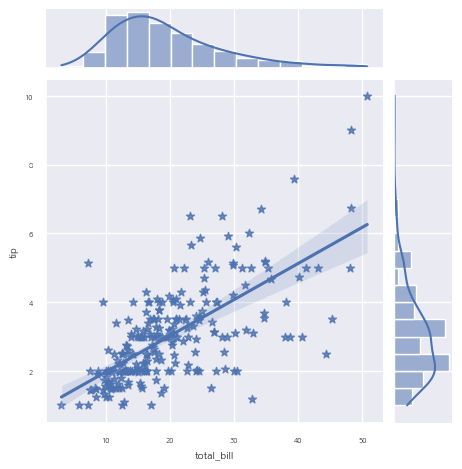

In [243]:
g = sns.jointplot(x="total_bill", y="tip", height=5, data=tips, kind="reg", marker ='*')

# Customize the ticks
g.ax_joint.tick_params(axis='x', labelsize=5)
g.ax_joint.tick_params(axis='y', labelsize=5)

# Adjust the axis labels
g.ax_joint.set_xlabel('total_bill', fontsize=7)
g.ax_joint.set_ylabel('tip', fontsize=7)

plt.show()

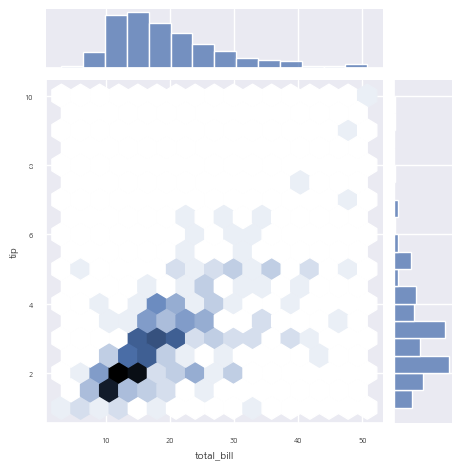

In [244]:
g = sns.jointplot(x="total_bill", y="tip", height=5, data=tips, kind="hex")

# Customize the ticks
g.ax_joint.tick_params(axis='x', labelsize=5)
g.ax_joint.tick_params(axis='y', labelsize=5)

# Adjust the axis labels
g.ax_joint.set_xlabel('total_bill', fontsize=7)
g.ax_joint.set_ylabel('tip', fontsize=7)

plt.show()

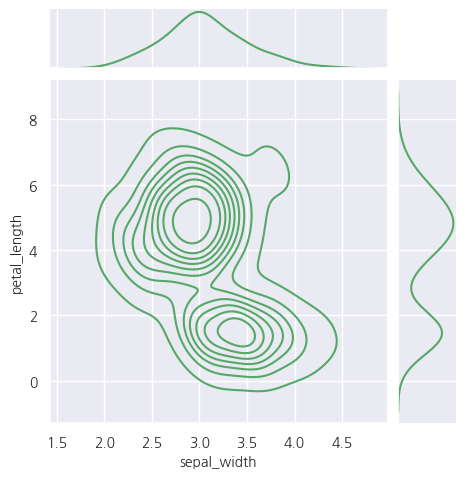

In [245]:
g = sns.jointplot(x="sepal_width", y="petal_length", height=5, data=iris, kind="kde", color="g")

# Customize the ticks
g.ax_joint.tick_params(axis='x', labelsize=10)
g.ax_joint.tick_params(axis='y', labelsize=10)

# Adjust the axis labels
g.ax_joint.set_xlabel('sepal_width', fontsize=10)
g.ax_joint.set_ylabel('petal_length', fontsize=10)

plt.show()


### 6. Kde plot
Histogram 보다 부드러운 곡선

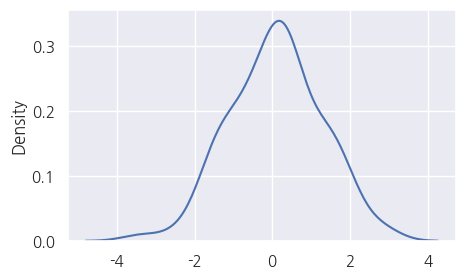

In [246]:
plt.figure(figsize = (5,3))
sns.kdeplot(x=x)
plt.show()

### 7. Pair plot

집합의 조합에 대해 히스토그램과 분포도 그림

숫자형 컬럼에 대해서만 그려줌

<Figure size 500x500 with 0 Axes>

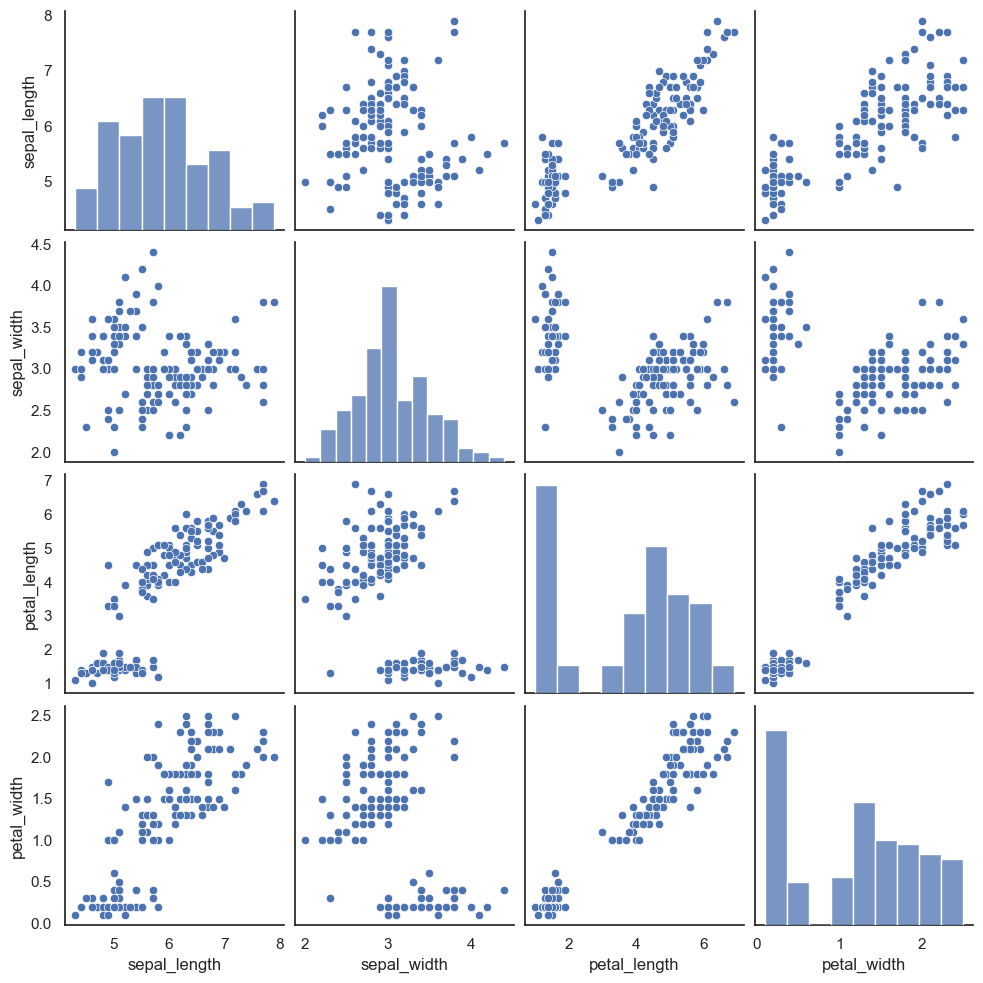

In [247]:
plt.figure(figsize=(5,5))
sns.set_style('white')
sns.pairplot(iris)
plt.show()

### 8. Relplot
컬럼과 컬럼간의 relation을 볼 때 유용

[공식문서](https://seaborn.pydata.org/generated/seaborn.relplot.html#seaborn.relplot)

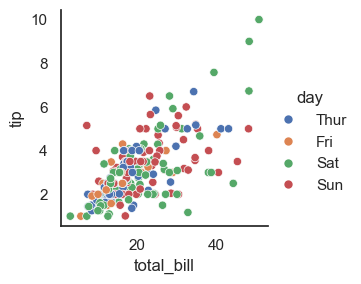

In [248]:
sns.relplot(x="total_bill", y="tip", hue="day", height=3, data=tips)
plt.show()


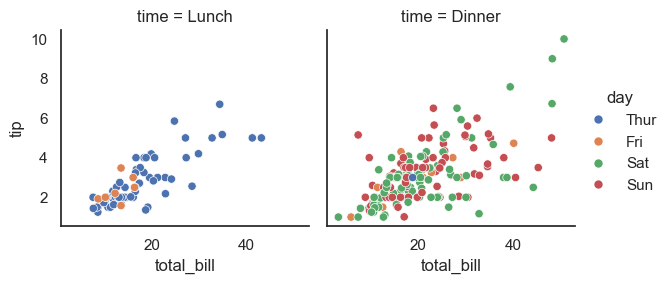

In [249]:
sns.relplot(x="total_bill", y="tip", hue="day", col="time", height=3, data=tips) # col 옵션으로 그래프 분할
plt.show()


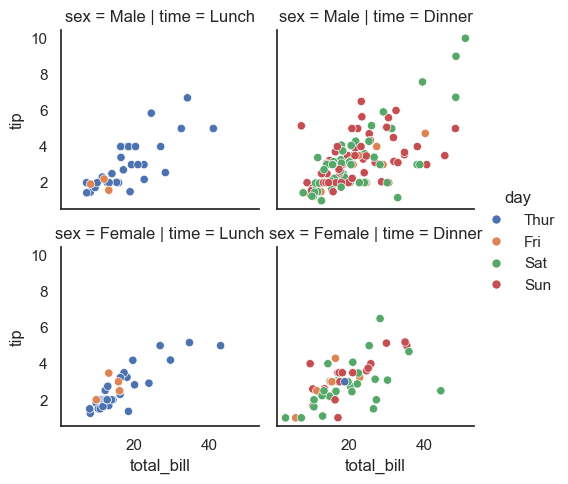

In [250]:
sns.relplot(x="total_bill", y="tip", hue="day", row="sex", col="time", height=2.5, data=tips) #row와 column에 표기할 데이터 column 선택
plt.show()


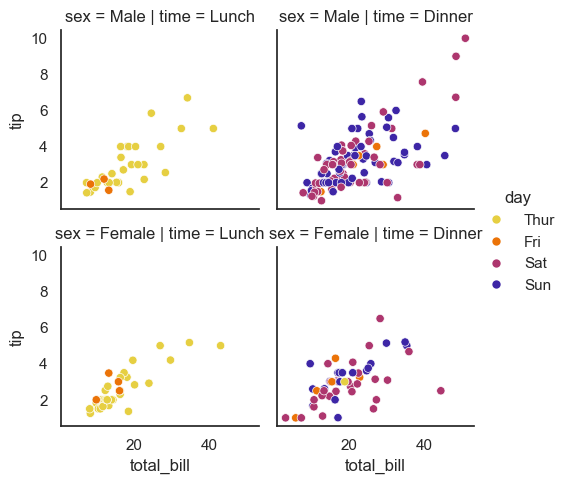

In [251]:
# 컬러 팔레트 적용
sns.relplot(x="total_bill", y="tip", hue="day", row="sex", col="time", height=2.5, palette='CMRmap_r', data=tips)
plt.show()


### 9. Viloin Plot

column에 대한 데이터의 비교 분포도 확인 가능

[공식문서](https://seaborn.pydata.org/generated/seaborn.violinplot.html)

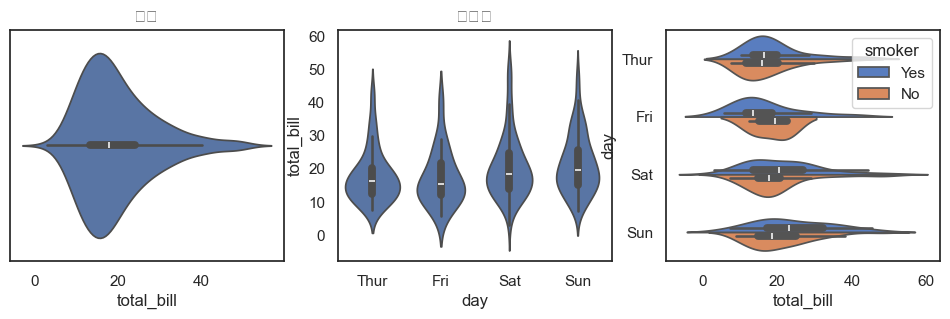

In [252]:
plt.figure(figsize = (12,3))

plt.subplot(131)
sns.violinplot(x=tips["total_bill"])
plt.title("기본")

plt.subplot(132)
sns.violinplot(x="day", y="total_bill", data=tips)
plt.title("가로형")

plt.subplot(133)
# hue 옵션으로 단일 컬럼에 대한 바이올린 모양 비교 가능
sns.violinplot(y="day", x="total_bill", hue="smoker", data=tips, palette="muted", split = True)


plt.show()


### 10. Lmplot = regression + Scatter

column 간의 선형관계 확인

outlier도 짐작 가능

[공식문서](https://seaborn.pydata.org/generated/seaborn.lmplot.html)

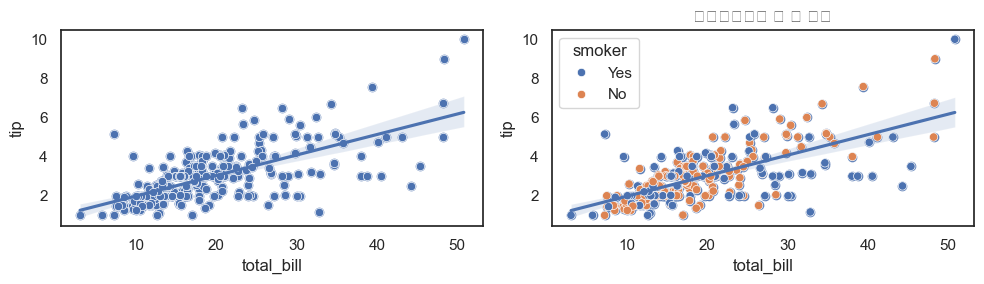

In [253]:
# lmplot은 개별 figure를 생성하므로 subplot에 적합하지 않음

fig, axes = plt.subplots(1,2,figsize = (10,3))

# 첫 번째 그래프
sns.regplot(ax=axes[0], data=tips, x="total_bill", y="tip")
sns.scatterplot(ax=axes[0],data=tips, x="total_bill", y="tip")
# axes[0].set_title("Total Bill vs Tip")

# 두 번째 그래프
sns.regplot(ax=axes[1], data=tips, x="total_bill", y="tip")
sns.scatterplot(data=tips, x="total_bill", y="tip", hue="smoker", ax=axes[1])
axes[1].set_title("다중선형관계 볼 수 없음")

plt.tight_layout()
plt.show()


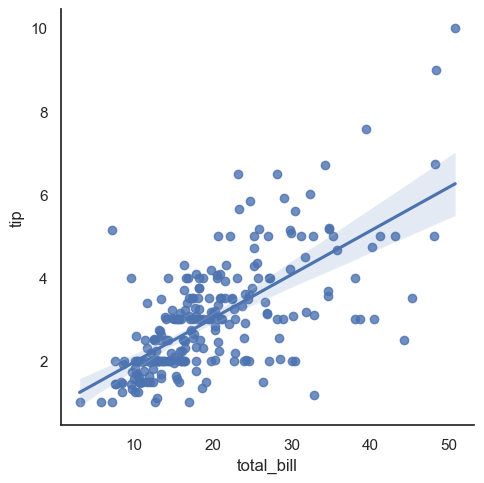

In [254]:
sns.lmplot(x="total_bill", y="tip", height=5, data=tips)
plt.show()


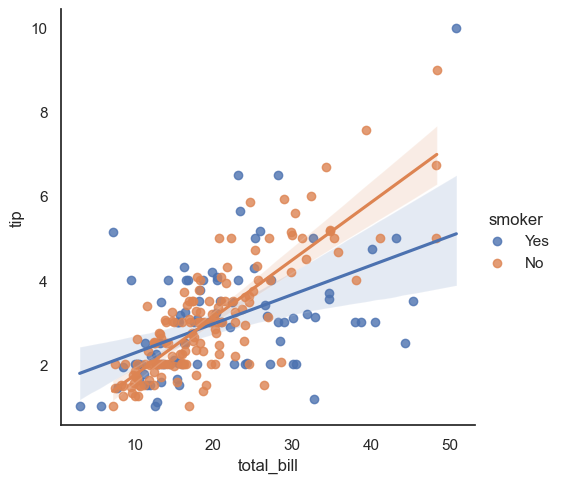

In [255]:
sns.lmplot(x="total_bill", y="tip", hue="smoker", height=5, data=tips)
plt.show()


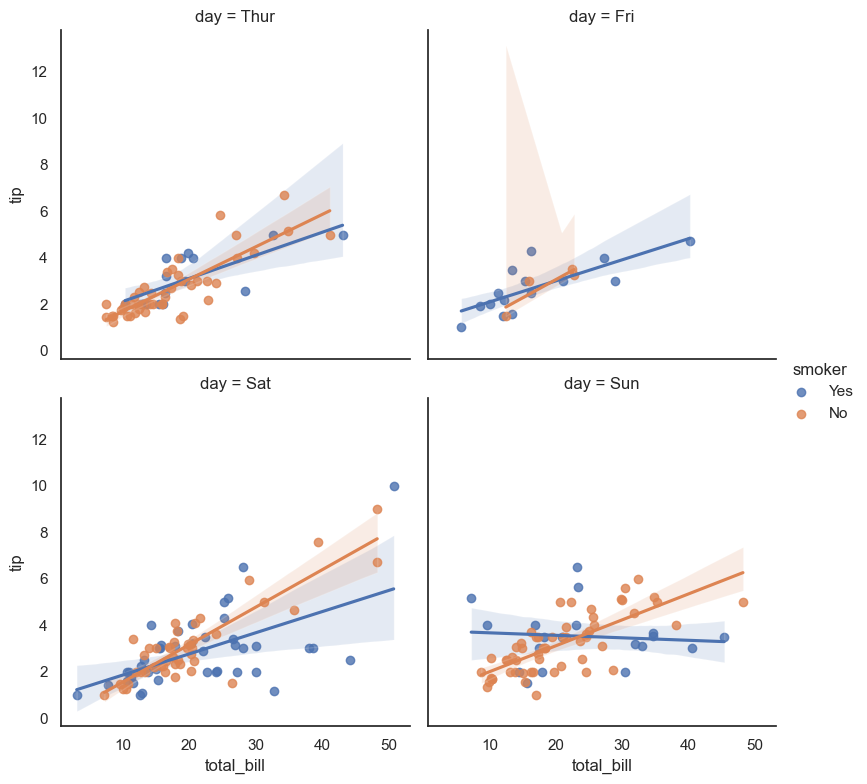

In [256]:
sns.lmplot(x='total_bill', y='tip', hue='smoker', col='day', col_wrap=2, height=4, data=tips)
plt.show()


### 11. others - rug plot, Swarm plot

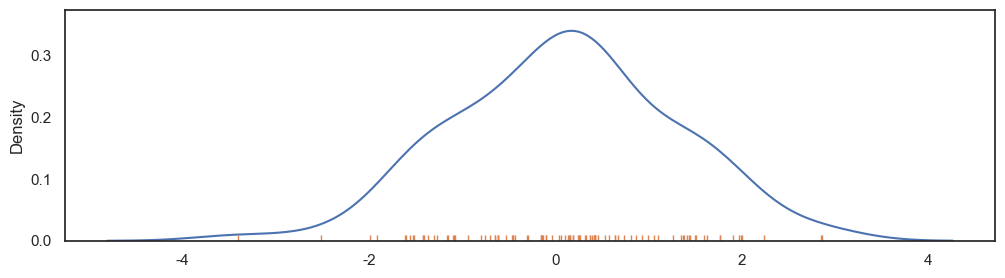

In [257]:
# rugplot ; rug는 데이터 위치를 x축 위에 작은 선분(rug)으로 나타내어 데이터들의 위치 및 분포를 보여준다.
sns.kdeplot(x=x)
sns.rugplot(x=x)
plt.show()

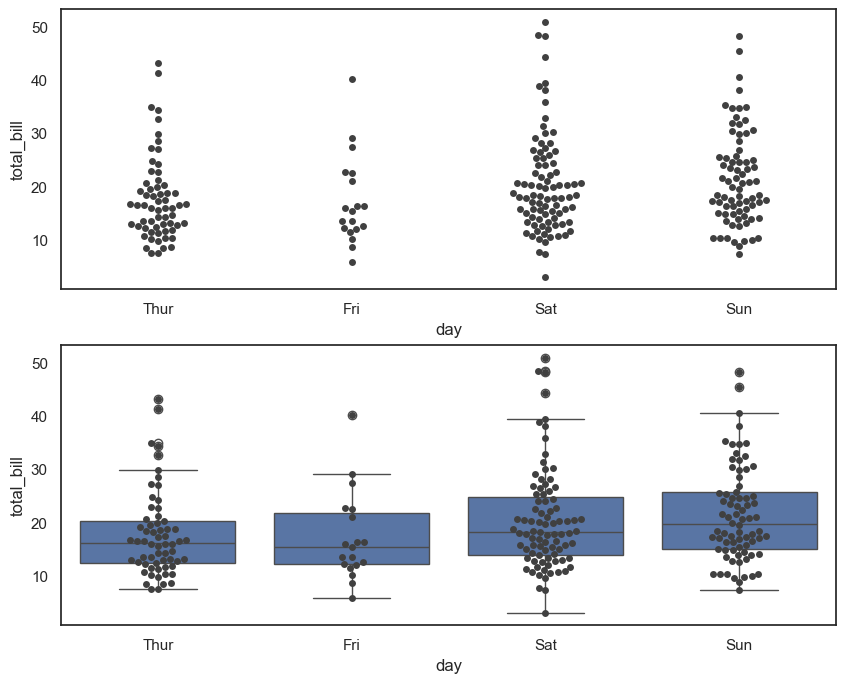

In [258]:
# Swarm plot

plt.figure(figsize=(10,8))
plt.subplot(211)
sns.swarmplot(x='day', y='total_bill', data=tips, color='.25')

plt.subplot(212)
sns.boxplot(x='day', y='total_bill', data=tips)
sns.swarmplot(x='day', y='total_bill', data=tips, color='.25')

plt.show()
